<a href="https://colab.research.google.com/github/angiegh2002/language_app/blob/main/language_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install arabic-reshaper python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 6.4 MB/s eta 0:00:00


In [ ]:
# !curl -X GET  "https://huggingface.co/api/datasets/riotu-lab/arabic_reverse_dictionary/parquet/default/train"

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_parquet("/content/drive/MyDrive/Dataset data/data.parquet")


In [5]:
dataset.head()

,word,definition
0,تمنيع ذاتي,تحريض لاستجابة مناعية لبعض مكونات العضوية [الك...
1,مَسارٌ هاملتوني,مسار يمر عبر كل رأس في رسم بياني دون تكرار أي ...
2,الكلمة,أصغر وحدة لغوية تحمل معنى مستقل ويمكن استخدامه...
3,طرف,الجانبي جمع (طرفَة) وهو الغريبة من التمر [لغة]
4,الاسم,كلمة تدل على شيء أو شخص أو مكان وتستخدم عادة ف...


In [6]:
dataset.shape

(58607, 2)

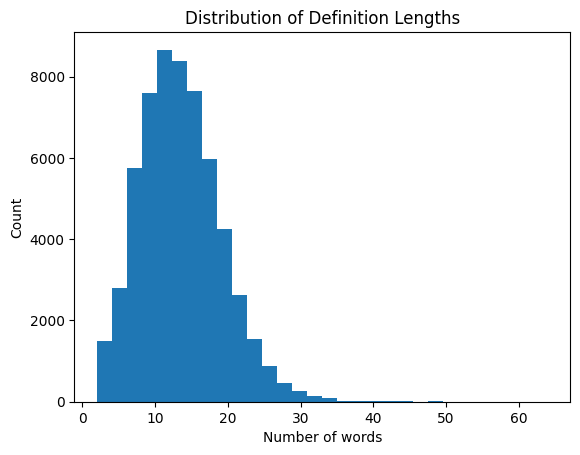

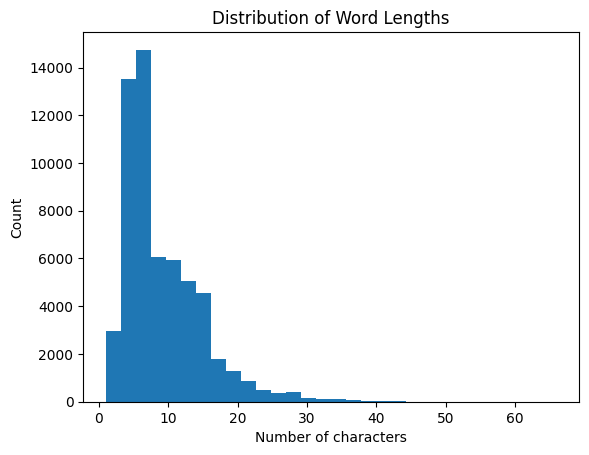

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
def_lengths = [len(str(row['definition']).split()) for index, row in dataset.iterrows() if row['definition'] is not None]
word_lengths = [len(str(row['word'])) for index, row in dataset.iterrows() if row['word'] is not None]

plt.hist(def_lengths, bins=30)
plt.title("Distribution of Definition Lengths")
plt.xlabel("Number of words")
plt.ylabel("Count")
plt.show()

plt.hist(word_lengths, bins=30)
plt.title("Distribution of Word Lengths")
plt.xlabel("Number of characters")
plt.ylabel("Count")
plt.show()

In [8]:
definitions = [row['definition'] for index, row in dataset.iterrows()]
words = [row['word'] for index, row in dataset.iterrows()]

print(f"Missing definitions: {sum([d is None for d in definitions])}")
print(f"Missing words: {sum([w is None for w in words])}")

print(f"Unique words: {len(set(words))}")

Missing definitions: 0
Missing words: 2
Unique words: 35617


In [9]:
dataset_clean = dataset.dropna(subset=['word'])
print(f"بعد التنظيف: {len(dataset_clean)} صف")


بعد التنظيف: 58605 صف


In [10]:
dataset_clean.duplicated().sum()

np.int64(61)

In [11]:
dataset_clean = dataset_clean.drop_duplicates()
print(f"بعد التنظيف: {len(dataset_clean)} صف")

بعد التنظيف: 58544 صف


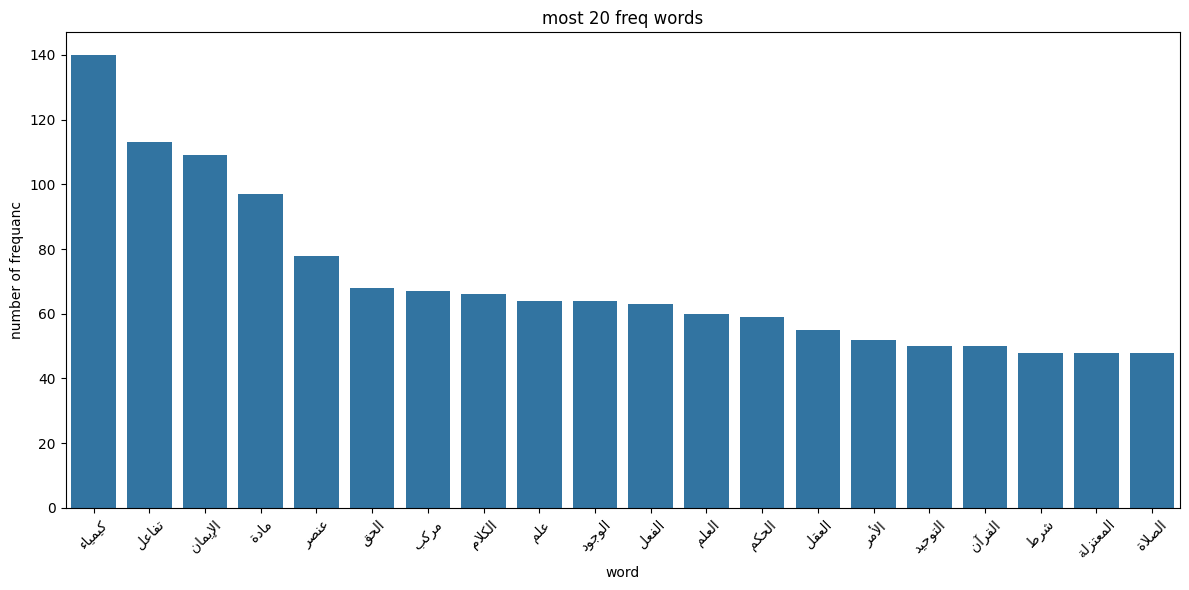

In [12]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

word_counter = Counter(dataset_clean["word"])
common_words = word_counter.most_common(20)

reshaped_words = [arabic_reshaper.reshape(word) for word, _ in common_words]
bidi_words = [get_display(w) for w in reshaped_words]
counts = [count for _, count in common_words]

plt.figure(figsize=(12, 6))
sns.barplot(x=bidi_words, y=counts)
plt.xticks(rotation=45)
plt.title("most 20 freq words")
plt.xlabel("word")
plt.ylabel("number of frequanc")
plt.tight_layout()
plt.show()


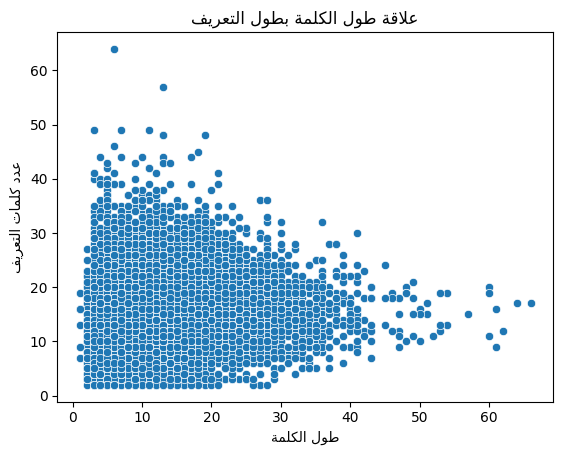

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

dataset_clean["word_length"] = dataset_clean["word"].apply(len)
dataset_clean["def_length"] = dataset_clean["definition"].apply(lambda x: len(str(x).split()))

sns.scatterplot(data=dataset_clean, x="word_length", y="def_length")

title_reshaped = arabic_reshaper.reshape("علاقة طول الكلمة بطول التعريف")
title_bidi = get_display(title_reshaped)
plt.title(title_bidi)

xlabel_reshaped = arabic_reshaper.reshape("طول الكلمة")
xlabel_bidi = get_display(xlabel_reshaped)
plt.xlabel(xlabel_bidi)

ylabel_reshaped = arabic_reshaper.reshape("عدد كلمات التعريف")
ylabel_bidi = get_display(ylabel_reshaped)
plt.ylabel(ylabel_bidi)

plt.show()

In [14]:
rare_words = word_counter.most_common()[-20:]
print("كلمات نادرة في البيانات:", [w for w, _ in rare_words])


كلمات نادرة في البيانات: ['طيف إصدار', 'بيان موجه ضعيف الترابط', 'ذراع', 'مصفوفة مهيمنة قطرية', 'قاعدة عضوية', 'قاعدة الميزان', 'منظار الحنجرة', 'عدد ماخ', 'الحشاشون', 'تکلید مشع', 'جزيئات', 'مُؤَشِّرُ الأسعار', 'يُعجب', 'تقسيم منتشر', 'الـشراء', 'الأخيف', 'السَّعْي إِذا كَانَ', 'الحاجات', 'مُبَرّد بيني', 'مُبَرْهَنةُ التَّمْدِيدِ لِتِيتُس']


In [15]:
dataset_clean["starts_with"] = dataset_clean["definition"].apply(lambda x: str(x).strip().split(" ")[0])
starts_freq = Counter(dataset_clean["starts_with"])
print("أكثر الكلمات بداية للتعريف:", starts_freq.most_common(10))


أكثر الكلمات بداية للتعريف: [('هو', 2703), ('مصطلح', 2159), ('عملية', 1995), ('هي', 1781), ('ما', 1207), ('مجموعة', 1135), ('اسم', 875), ('نوع', 845), ('حالة', 741), ('في', 712)]


In [16]:
unique_defs = set(dataset_clean["definition"])
print(f"نسبة التعاريف الفريدة: {len(unique_defs) / len(dataset_clean):.2%}")


نسبة التعاريف الفريدة: 99.91%


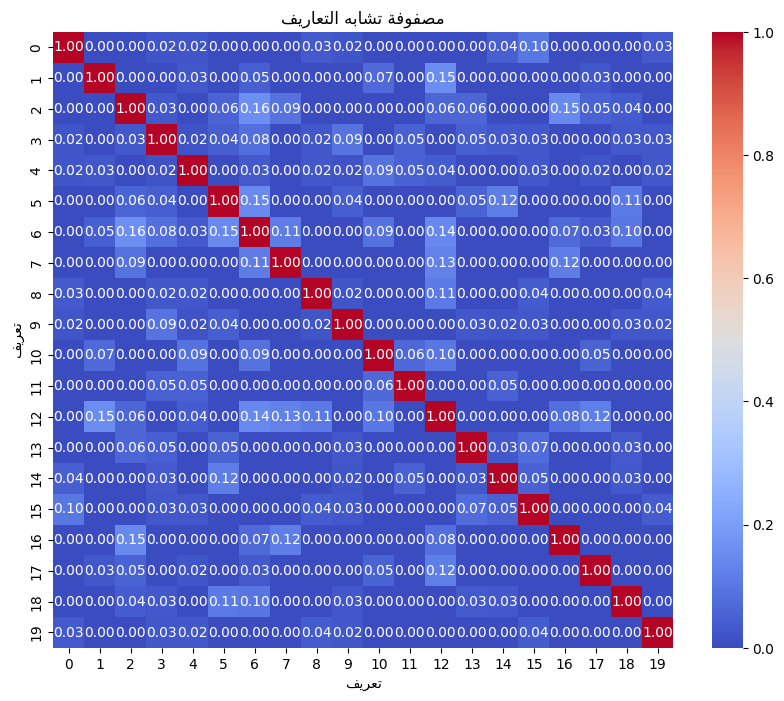

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

sample_defs = dataset_clean["definition"].dropna().sample(20, random_state=42).astype(str)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sample_defs)

similarity_matrix = cosine_similarity(X)
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap="coolwarm", annot=True, fmt=".2f")

title_ar = "مصفوفة تشابه التعاريف"
reshaped_title = arabic_reshaper.reshape(title_ar)
bidi_title = get_display(reshaped_title)
plt.title(bidi_title)

label_reshaped = arabic_reshaper.reshape("تعريف")
label_bidi = get_display(label_reshaped)

plt.xlabel(label_bidi)
plt.ylabel(label_bidi)
plt.show()


In [18]:
import re

def remove_diacritics(text):
    arabic_diacritics = re.compile("""
         ّ    | # Shadda
         َ    | # Fatha
         ً    | # Tanwin Fath
         ُ    | # Damma
         ٌ    | # Tanwin Damm
         ِ    | # Kasra
         ٍ    | # Tanwin Kasr
         ْ    | # Sukun
         ـ     # Tatwil/Kashida
     """, re.VERBOSE)
    return re.sub(arabic_diacritics, '', text)

def clean_definition(text):
    if pd.isna(text) or not isinstance(text, str):
        return ""
    # text = re.sub(r'\s*\[[^\]]*\]\s*', ' ', text)
    text = re.sub(r'\b[a-zA-Z]+\b', ' ', text)
    text = re.sub(r'\b\d+[a-zA-Z]*\d*\b', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\s+،\s*', '، ', text)
    text = re.sub(r'\s+\.+\s*', '. ', text)
    text = re.sub(r'^[\s\.,،]+|[\s\.,،]+$', '', text)

    text = remove_diacritics(text)

    return text.strip()


In [19]:
def preprocess(row):
    cleaned_definition = clean_definition(row['definition'])
    word_no_diacritics = remove_diacritics(row['word'])
    word_no_diacritics = remove_diacritics(row['word'])
    return pd.Series({
        "input_text": f" صف الكلمة التالية : {word_no_diacritics}",
        "target_text": cleaned_definition
    })

processed_df = dataset_clean.apply(preprocess, axis=1)

In [20]:
processed_df

,input_text,target_text
0,صف الكلمة التالية : تمنيع ذاتي,تحريض لاستجابة مناعية لبعض مكونات العضوية [الك...
1,صف الكلمة التالية : مسار هاملتوني,مسار يمر عبر كل رأس في رسم بياني دون تكرار أي ...
2,صف الكلمة التالية : الكلمة,أصغر وحدة لغوية تحمل معنى مستقل ويمكن استخدامه...
3,صف الكلمة التالية : طرف,الجانبي جمع (طرفة) وهو الغريبة من التمر [لغة]
4,صف الكلمة التالية : الاسم,كلمة تدل على شيء أو شخص أو مكان وتستخدم عادة ف...
...,...,...
58602,صف الكلمة التالية : الاستفهام,طلب معرفة شيء أو تأكيده [لغة]
58603,صف الكلمة التالية : السعي إذا كان,التعبير عن المضي الجري والسعي نحو شيء ما [لغة،...
58604,صف الكلمة التالية : الحاجات,المتطلبات الأساسية أو الضرورية للإنسان [اجتماع...
58605,صف الكلمة التالية : مبرد بيني,مبادل حراري لتبريد الهواء بين مراحل الضغط المت...


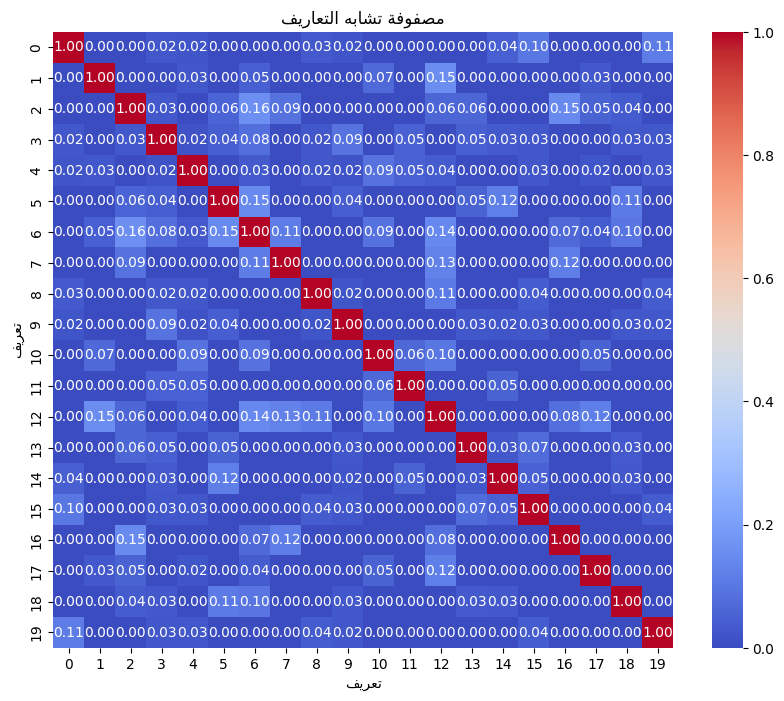

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

sample_defs = processed_df["target_text"].dropna().sample(20, random_state=42).astype(str)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sample_defs)

similarity_matrix = cosine_similarity(X)
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap="coolwarm", annot=True, fmt=".2f")

title_ar = "مصفوفة تشابه التعاريف"
reshaped_title = arabic_reshaper.reshape(title_ar)
bidi_title = get_display(reshaped_title)
plt.title(bidi_title)

label_reshaped = arabic_reshaper.reshape("تعريف")
label_bidi = get_display(label_reshaped)

plt.xlabel(label_bidi)
plt.ylabel(label_bidi)
plt.show()


In [22]:

unique_defs = set(processed_df["target_text"])
print(f" نسبة التعاريف الفريدة بعد التنظيف: {len(unique_defs) / len(dataset_clean):.2%}")


 نسبة التعاريف الفريدة بعد التنظيف: 99.86%


In [23]:
# from transformers import T5Tokenizer, T5ForConditionalGeneration

# model_name = "UBC-NLP/AraT5-base"
# tokenizer = T5Tokenizer.from_pretrained(model_name)
# model = T5ForConditionalGeneration.from_pretrained(model_name)

In [24]:
from transformers import AutoTokenizer, T5ForConditionalGeneration

model_name = "flax-community/arabic-t5-small"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/683 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [25]:
from datasets import Dataset
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = Dataset.from_pandas(processed_df)
dataset_split = dataset.train_test_split(test_size=0.2, seed=42)
temp_split = dataset_split['test'].train_test_split(test_size=0.5, seed=42)

train_dataset = dataset_split['train']
val_dataset = temp_split['train']
test_dataset = temp_split['test']


In [26]:
def preprocess_function(examples):
    inputs = [inp for inp in examples["input_text"]]
    targets = [tgt for tgt in examples["target_text"]]

    model_inputs = tokenizer(
        inputs,
        max_length=128,
        truncation=True,
        padding="max_length",
        return_tensors=None
    )

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            targets,
            max_length=128,
            truncation=True,
            padding="max_length",
            return_tensors=None
        )

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_val   = val_dataset.map(preprocess_function, batched=True)
tokenized_test  = test_dataset.map(preprocess_function, batched=True)


Map:   0%|          | 0/46835 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3950: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/5854 [00:00<?, ? examples/s]

Map:   0%|          | 0/5855 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoTokenizer, T5ForConditionalGeneration, Adafactor, TrainingArguments, Trainer, DataCollatorForSeq2Seq
from evaluate import load
import numpy as np

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

rouge = load("rouge")
bleu = load("bleu")

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [label.strip() for label in decoded_labels]

    rouge_scores = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    bleu_score = bleu.compute(predictions=[pred.split() for pred in decoded_preds],
                              references=[[ref.split()] for ref in decoded_labels])

    return {
        "rougeL": rouge_scores["rougeL"].mid.fmeasure,
        "bleu": bleu_score["bleu"]
    }

training_args = TrainingArguments(
    output_dir="./arabict5-description-model",
    do_train=True,
    do_eval=True,
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    save_steps=1000,
    eval_steps=500,
    save_total_limit=2,
    fp16=True,
    report_to="none",
    run_name="arabict5-run"
)

optimizer = Adafactor(
    model.parameters(),
    scale_parameter=True,
    relative_step=False,
    warmup_init=False,
    lr=3e-5
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    optimizers=(optimizer, None),
    compute_metrics=compute_metrics
)

/tmp/ipython-input-4024811255.py:58: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()
trainer.save_model("/content/drive/MyDrive/arabict5-final")

Step,Training Loss
100,14.965300
200,1.687700
300,0.801700
400,0.730300
500,0.704100


In [ ]:
import torch
torch.cuda.empty_cache()

final_metrics = trainer.evaluate()
print("نتائج التقييم النهائية على مجموعة الاختبار:")
print(final_metrics)
for k, v in final_metrics.items():
    if "rouge" in k:
        print(f"{k}: {v:.2f}")


OutOfMemoryError: CUDA out of memory. Tried to allocate 502.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 280.12 MiB is free. Process 5825 has 14.46 GiB memory in use. Of the allocated memory 14.18 GiB is allocated by PyTorch, and 157.13 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_path = "/content/drive/MyDrive/arabict5-final"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to("cuda")
model.eval()

for i in range(10):
    example = tokenized_test[i]

    input_ids = torch.tensor(example['input_ids']).unsqueeze(0).to("cuda")
    attention_mask = torch.tensor(example['attention_mask']).unsqueeze(0).to("cuda")

    with torch.no_grad():
        output_ids = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=50,
            num_beams=4,
            no_repeat_ngram_size=3,
            early_stopping=True
        )

    input_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    print(f" الإدخال: {input_text}")
    print(f" الناتج: {output_text}")
    print("="*50)


 الإدخال: صف الكلمة التالية : التقرب
 الناتج: : التقرب إلى الله ، ويعبر عن رغبة ورغبة في التقرب من الله إلى الله تعالى
 الإدخال: صف الكلمة التالية : سكريد
 الناتج: 
 الإدخال: صف الكلمة التالية : البرزخ
 الناتج: : البرزخ ، البرزخ، والبرزخ، أو البرزخ.
 الإدخال: صف الكلمة التالية : المسكنة
 الناتج: 
 الإدخال: صف الكلمة التالية : مثلث قطبي ذاتيا
 الناتج: أو كليهما متوازيان متلاصقان أو مساويا ويعبر عن مغامرتيهوي ذاتيا ، ويتكون من مجموعة من المثلثات و المثلثات التي
 الإدخال: صف الكلمة التالية : معامل الامتصاص الخطي
 الناتج: : معامل الامتصاص الخطي وعوامل الامتصاص ، معامل الإمتصاص الخطي، معامل الموجات الامتصاصية، معامل امتصاص الخطي. وعلاوة على ذلك، يتم قياس معامل التشبع في الامتصاص، معامل
 الإدخال: صف الكلمة التالية : ناقل حركة مسنني
 الناتج: ناقل حركة مسنني
 الإدخال: صف الكلمة التالية : توليوم
 الناتج: : توليوموموموم :
 الإدخال: صف الكلمة التالية : مجرور
 الناتج: مجرور مجرور أو مجرور، مجرور من مجرور إلى الياء
 الإدخال: صف الكلمة التالية : نحوعلمي
 الناتج: 


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_path = "/content/drive/MyDrive/arabict5-final"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path)

input_text = "صف الكلمة التالية : الاستدلال "
inputs = tokenizer(input_text, return_tensors="pt", padding=True)

outputs = model.generate(
    inputs["input_ids"],
    max_length=50,
    num_beams=4,
    early_stopping=True
)

generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("الوصف:", generated_text)


الوصف: : الاستدلال و الاستدلال الاستدلال و الاستدلال : الاستدلال و الاستدلال الاستدلال : الاستدلال : الاستدلال و الاستدلال


In [ ]:
from transformers import AutoTokenizer, T5ForConditionalGeneration, Adafactor, TrainingArguments, Trainer, DataCollatorForSeq2Seq
from evaluate import load
import numpy as np

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

rouge = load("rouge")
bleu = load("bleu")

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [label.strip() for label in decoded_labels]

    rouge_scores = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    bleu_score = bleu.compute(predictions=[pred.split() for pred in decoded_preds],
                              references=[[ref.split()] for ref in decoded_labels])

    return {
        "rougeL": rouge_scores["rougeL"].mid.fmeasure,
        "bleu": bleu_score["bleu"]
    }

training_args = TrainingArguments(
    output_dir="./arabict5-description-model",
    do_train=True,
    do_eval=True,
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=16,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    save_steps=1000,
    eval_steps=500,
    save_total_limit=2,
    fp16=True,
    report_to="none",
    run_name="arabict5-run"
)

optimizer = Adafactor(
    model.parameters(),
    scale_parameter=True,
    relative_step=False,
    warmup_init=False,
    lr=3e-5
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    optimizers=(optimizer, None),
    compute_metrics=compute_metrics
)

/tmp/ipython-input-2855101573.py:58: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()
trainer.save_model("/content/drive/MyDrive/arabict5-final_10e")

Step,Training Loss
100,0.674200
200,0.651000
300,0.634800
400,0.626400
500,0.617600
600,0.614400
700,0.606900
800,0.606100
900,0.600600
1000,0.595000


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_path = "/content/drive/MyDrive/arabict5-final_10e"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to("cuda")
model.eval()

for i in range(10):
    example = tokenized_test[i]

    input_ids = torch.tensor(example['input_ids']).unsqueeze(0).to("cuda")
    attention_mask = torch.tensor(example['attention_mask']).unsqueeze(0).to("cuda")

    with torch.no_grad():
        output_ids = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=50,
            num_beams=4,
            no_repeat_ngram_size=3,
            early_stopping=True
        )

    input_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    print(f" الإدخال: {input_text}")
    print(f" الناتج: {output_text}")
    # print("="*50)


 الإدخال: صف الكلمة التالية : التقرب
 الناتج: التقرب إلى الله تعالى، ويعبر عن نفسه
 الإدخال: صف الكلمة التالية : سكريد
 الناتج: مصطلح يستخدم في علم النفس للدلالة على وجود مادة كيميائية، يستخدم في
 الإدخال: صف الكلمة التالية : البرزخ
 الناتج: صفة ترمز إلى الله تعالى، ويعبر عن الفطرة
 الإدخال: صف الكلمة التالية : المسكنة
 الناتج: هي الصفة التي ترمز إلى الإرث أو الإرث، ويعبر عن الإرث
 الإدخال: صف الكلمة التالية : مثلث قطبي ذاتيا
 الناتج: المثلث الذي يتكون من مجموعة من المثلثات التي تتكون من مجموعة متوازية، وتتكون من ثلاثة أضلاع، تستخدم في
 الإدخال: صف الكلمة التالية : معامل الامتصاص الخطي
 الناتج: معامل تستخدم في التحليل الفني لتحليل البيانات
 الإدخال: صف الكلمة التالية : ناقل حركة مسنني
 الناتج: ناقل حركة مسنني يستخدم للإشارة إلى مجموعة من الإشارات ويعبر عن خصائص معينة
 الإدخال: صف الكلمة التالية : توليوم
 الناتج: عملية تنموهات ويعبر عنها لتنويه
 الإدخال: صف الكلمة التالية : مجرور
 الناتج: اسم يدل على صفة مجرورة بمفعول مجرور
 الإدخال: صف الكلمة التالية : نحوعلمي
 الناتج: مصطلح يستخدم في 

In [ ]:
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_path = "/content/drive/MyDrive/arabict5-final_10e"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to("cuda")
model.eval()
device = "cuda"

data = {'كلمة': [ 'متوسط حسابي']}
df = pd.DataFrame(data)

df['input_text'] = df['كلمة'].apply(lambda x: f"صف الكلمة التالية : {x}")

inputs = tokenizer(list(df['input_text']), return_tensors="pt", padding=True, truncation=True)

with torch.no_grad():
    outputs = model.generate(
        input_ids=inputs['input_ids'].to(device),
        attention_mask=inputs['attention_mask'].to(device),
        max_length=60,
        num_beams=1,
        no_repeat_ngram_size=1,
        early_stopping=True
    )

df['وصف'] = [tokenizer.decode(ids, skip_special_tokens=True) for ids in outputs]

print(df[['كلمة', 'وصف']])


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


          كلمة                                                وصف
0  متوسط حسابي  معادلة معينة تحدد مدى فعالية البيانات في الريا...


In [ ]:
from transformers import AutoTokenizer, T5ForConditionalGeneration, Adafactor, TrainingArguments, Trainer, DataCollatorForSeq2Seq
from evaluate import load
from transformers import TrainerCallback
import numpy as np

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

rouge = load("rouge")
bleu = load("bleu")

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [label.strip() for label in decoded_labels]

    rouge_scores = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    bleu_score = bleu.compute(predictions=[pred.split() for pred in decoded_preds],
                              references=[[ref.split()] for ref in decoded_labels])

    return {
        "rougeL": rouge_scores["rougeL"].mid.fmeasure,
        "bleu": bleu_score["bleu"]
    }

training_args = TrainingArguments(
    output_dir="./arabict5-description-model",
    do_train=True,
    do_eval=True,
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=16,
    num_train_epochs=15,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    save_steps=1000,
    eval_steps=500,
    save_total_limit=2,
    fp16=True,
    report_to="none",
    run_name="arabict5-run"
)

optimizer = Adafactor(
    model.parameters(),
    scale_parameter=True,
    relative_step=True,
    warmup_init=True,
    lr=None
)
class CustomTrainer(Trainer):
    def log(self, logs, *args, **kwargs):
        super().log(logs, *args, **kwargs)
        print(f"Step {self.state.global_step}:")
        for key, value in logs.items():
            print(f"  {key}: {value}")

class MetricsCallback(TrainerCallback):
    def on_evaluate(self, args, state, control, metrics=None, **kwargs):
        if metrics is not None:
            print(f"\n Evaluation results at step {state.global_step}:")
            for key, value in metrics.items():
                print(f"  {key}: {value:.4f}")
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    # optimizers=(optimizer, None),
    compute_metrics=compute_metrics,
    callbacks=[MetricsCallback()]
)

/tmp/ipython-input-3830174978.py:71: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(


In [ ]:
trainer.train()
trainer.save_model("/content/drive/MyDrive/arabict5-final_15e")

Step,Training Loss
100,2.653900
200,0.600200
300,0.576900
400,0.565700
500,0.553800
600,0.547100
700,0.538300
800,0.534300
900,0.527500
1000,0.518100


Step 100:
  loss: 2.6539
  grad_norm: 0.1266295611858368
  learning_rate: 2.8918032786885247e-05
  epoch: 0.546448087431694
Step 200:
  loss: 0.6002
  grad_norm: 0.12343886494636536
  learning_rate: 2.7825136612021858e-05
  epoch: 1.092896174863388
Step 300:
  loss: 0.5769
  grad_norm: 0.12654434144496918
  learning_rate: 2.6732240437158472e-05
  epoch: 1.639344262295082
Step 400:
  loss: 0.5657
  grad_norm: 0.12405309826135635
  learning_rate: 2.5639344262295083e-05
  epoch: 2.185792349726776
Step 500:
  loss: 0.5538
  grad_norm: 0.13810022175312042
  learning_rate: 2.4546448087431694e-05
  epoch: 2.73224043715847
Step 600:
  loss: 0.5471
  grad_norm: 0.14914925396442413
  learning_rate: 2.3453551912568308e-05
  epoch: 3.278688524590164
Step 700:
  loss: 0.5383
  grad_norm: 0.14524023234844208
  learning_rate: 2.236065573770492e-05
  epoch: 3.8251366120218577
Step 800:
  loss: 0.5343
  grad_norm: 0.14396966993808746
  learning_rate: 2.126775956284153e-05
  epoch: 4.371584699453552
Ste

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_path = "/content/drive/MyDrive/arabict5-final_15e"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to("cuda")
model.eval()

for i in range(20):
    example = tokenized_test[i]

    input_ids = torch.tensor(example['input_ids']).unsqueeze(0).to("cuda")
    attention_mask = torch.tensor(example['attention_mask']).unsqueeze(0).to("cuda")

    with torch.no_grad():
        output_ids = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=50,
            num_beams=1,
            no_repeat_ngram_size=1,
            early_stopping=True
        )

    input_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    print(f" الإدخال: {input_text}")
    print(f" الناتج: {output_text}")
    print("="*50)


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : التقرب
 الناتج: التقرب إلى الله تعالى، وهو ما يجعل من العبد في حالة عدم الرضا عن نفسه


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : سكريد
 الناتج: مركب كيميائي يتكون من مجموعة أو أكثر، يستخدم في العديد التطبيقات الصناعية


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : البرزخ
 الناتج: ما يماثله إلى الله تعالى، وهو من صفات الوجود


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : المسكنة
 الناتج: صفة تشير إلى وجود شيء معين أو غير قابل للكسر


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : مثلث قطبي ذاتيا
 الناتج: مثلث يتكون من ثلاثة أوجه، حيث يكون كل طرف في نقطة معينة


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : معامل الامتصاص الخطي
 الناتج: مقياس يستخدم في القياسات الهندسية، حيث يتم قياس قيمة الامتصاص الخطي


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : ناقل حركة مسنني
 الناتج: ناقل حركة يتكون من مجموعة المنحنيات التي يمكن أن تحدث في الفضاء، مما يؤدي إلى تغير اتجاه معين


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : توليوم
 الناتج: نوى أو منعم


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : مجرور
 الناتج: حرف جر يدل على 'لا"، ويستخدم في اللغة العربية


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : نحوعلمي
 الناتج: مصطلح يستعمل في علم النفس للدلالة على من يتبنى نظرية معينة، مثل: نحوعلم


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : الخزلة
 الناتج: صفة من صفات الله تعالى تشير إلى عدم وجود شيء آخر، تستخدم في سياقات دينية


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : ضرورة
 الناتج: حالة من الصعوبة في تحديد شيء ما، مثل عدم وجود الشيء


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : الجنس
 الناتج: مجموعة من الأفراد ينتمون إلى جنس معين، مثل الجنس أو الحيوان


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : عنصر
 الناتج: مادة كيميائية لا يمكن تحليلها إلى مواد أبسط بواسطة عمليات التحلل، وتعتبر من المفاهيم الأساسية في


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : الطبع
 الناتج: هو صفة من صفات الله تعالى التي لا يمكن أن تكون في الأصل، أو ما يتعلق بالأحكام الشرعية


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : الإرادة
 الناتج: القدرة على اتخاذ القرارات أو الخضوع لها


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : المادة
 الناتج: كل شيء له كتلة ويشغل حيزا في الفضاء، ويمكن أن تكون المادة جزءا من مجال


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : سورة
 الناتج: جزء من القرآن الكريم، يستخدم في اللغة العربية للإشارة إلى الآيات القرآنية


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


 الإدخال: صف الكلمة التالية : تطبيق طبولوجي
 الناتج: هو تطبيق طبولوجي لمصطلحات معينة، حيث يتم استخدام الخوارزميات في مجالات مثل
 الإدخال: صف الكلمة التالية : دالة ناقصية
 الناتج: دالة رياضية تمثل قيمة تساوي صفرية، تستخدم في مجالات مثل الجبر والإحصاء


In [35]:
from transformers import AutoTokenizer, T5ForConditionalGeneration, Adafactor, TrainingArguments, Trainer, DataCollatorForSeq2Seq
from evaluate import load
from transformers import TrainerCallback
import numpy as np

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

rouge = load("rouge")
bleu = load("bleu")

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [label.strip() for label in decoded_labels]

    rouge_scores = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    bleu_score = bleu.compute(predictions=[pred.split() for pred in decoded_preds],
                              references=[[ref.split()] for ref in decoded_labels])

    return {
        "rougeL": rouge_scores["rougeL"].mid.fmeasure,
        "bleu": bleu_score["bleu"]
    }

training_args = TrainingArguments(
    output_dir="./arabict5-description-model",
    do_train=True,
    do_eval=True,
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=16,
    num_train_epochs=18,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    save_steps=1000,
    eval_steps=500,
    save_total_limit=2,
    fp16=True,
    report_to="none",
    run_name="arabict5-run"
)

optimizer = Adafactor(
    model.parameters(),
    scale_parameter=True,
    relative_step=True,
    warmup_init=True,
    lr=None
)

class CustomTrainer(Trainer):
    def log(self, logs, *args, **kwargs):
        super().log(logs, *args, **kwargs)
        print(f"Step {self.state.global_step}:", flush=True)
        for key, value in logs.items():
            print(f"  {key}: {value}", flush=True)

class MetricsCallback(TrainerCallback):
    def on_evaluate(self, args, state, control, metrics=None, **kwargs):
        if metrics is not None:
            print(f"\nEvaluation results at step {state.global_step}:", flush=True)
            for key, value in metrics.items():
                print(f"  {key}: {value:.4f}", flush=True)

trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    # optimizers=(optimizer, None),
    compute_metrics=compute_metrics,
    callbacks=[MetricsCallback()]
)

/tmp/ipython-input-1651847353.py:73: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(


In [36]:
trainer.train()
trainer.save_model("/content/drive/MyDrive/arabict5-final_18e")

Step,Training Loss
100,2.654600
200,0.648400
300,0.619900
400,0.606600
500,0.592700
600,0.585300
700,0.575200
800,0.570500
900,0.563300
1000,0.553100


Step 100:
  loss: 2.6546
  grad_norm: 0.13668715953826904
  learning_rate: 2.9098360655737705e-05
  epoch: 0.546448087431694
Step 200:
  loss: 0.6484
  grad_norm: 0.1514028161764145
  learning_rate: 2.818761384335155e-05
  epoch: 1.092896174863388
Step 300:
  loss: 0.6199
  grad_norm: 0.1638859063386917
  learning_rate: 2.7276867030965393e-05
  epoch: 1.639344262295082
Step 400:
  loss: 0.6066
  grad_norm: 0.15091367065906525
  learning_rate: 2.6366120218579237e-05
  epoch: 2.185792349726776
Step 500:
  loss: 0.5927
  grad_norm: 0.16127757728099823
  learning_rate: 2.5455373406193077e-05
  epoch: 2.73224043715847
Step 600:
  loss: 0.5853
  grad_norm: 0.16217881441116333
  learning_rate: 2.454462659380692e-05
  epoch: 3.278688524590164
Step 700:
  loss: 0.5752
  grad_norm: 0.17247678339481354
  learning_rate: 2.3633879781420766e-05
  epoch: 3.8251366120218577
Step 800:
  loss: 0.5705
  grad_norm: 0.17643605172634125
  learning_rate: 2.272313296903461e-05
  epoch: 4.371584699453552
Step 

In [40]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_path = "/content/drive/MyDrive/arabict5-final_18e"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to("cuda")
model.eval()

for i in range(20):
    example = tokenized_test[i]

    input_ids = torch.tensor(example['input_ids']).unsqueeze(0).to("cuda")
    attention_mask = torch.tensor(example['attention_mask']).unsqueeze(0).to("cuda")

    with torch.no_grad():
        output_ids = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=50,
            num_beams=1,
            no_repeat_ngram_size=1,
            # early_stopping=True
        )

    input_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    print(f" الإدخال: {input_text}")
    print(f" الناتج: {output_text}")
    print("="*50)


 الإدخال: صف الكلمة التالية : التقرب
 الناتج: التقرب إلى الله تعالى، وهو ما يتطلبه من فعله. في السياق الديني: هو الإبعاد عن النفس أو العلاقة بين الأفراد
 الإدخال: صف الكلمة التالية : سكريد
 الناتج: مركب كيميائي يتكون من مجموعة أو أكثر، يستخدم في التطبيقات الكيميائية والفيزيائية.[الكيمياء العضوية]
 الإدخال: صف الكلمة التالية : البرزخ
 الناتج: ما يماثله الإنسان من حياة وموت، ويعتبر في سياق العقيدة الإسلامية.[التوحيد]
 الإدخال: صف الكلمة التالية : المسكنة
 الناتج: صفة تشير إلى ما هو غير صحيح أو خاطئ في سياقات متعددة، تستخدم بشكل واسع لوصف العلاقة الجنسية بين الأفراد
 الإدخال: صف الكلمة التالية : مثلث قطبي ذاتيا
 الناتج: مثلث يتكون من ثلاثة أوجه، حيث يكون كل نقطة في نفس المثلث.[الهندسة]
 الإدخال: صف الكلمة التالية : معامل الامتصاص الخطي
 الناتج: مقياس يستخدم في [الإحصاء] لوصف تأثير الامتصاص الخطي
 الإدخال: صف الكلمة التالية : ناقل حركة مسنني
 الناتج: ناقل حركة يتكون من مجموعة واسعة النطاق تستخدم في التطبيقات الكهربائية، ويعتبر جزءا مهما عن طريق النمذجة.[الكهرومغناطيسية]
 الإدخال: صف الكلمة

In [39]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_path = "/content/drive/MyDrive/arabict5-final_18e"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to("cuda")
model.eval()

for i in range(30):
    example = tokenized_test[i]

    input_ids = torch.tensor(example['input_ids']).unsqueeze(0).to("cuda")
    attention_mask = torch.tensor(example['attention_mask']).unsqueeze(0).to("cuda")

    with torch.no_grad():
        output_ids = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=50,
            num_beams=1,
            no_repeat_ngram_size=1,
            early_stopping=True
        )

    input_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    print(f" الإدخال: {input_text}")
    print(f" الناتج: {output_text}")
    print("="*50)


 الإدخال: صف الكلمة التالية : التقرب
 الناتج: التقرب إلى الله تعالى، وهو ما يتطلبه من فعله. في السياق الديني: هو الإبعاد عن النفس أو العلاقة بين الأفراد
 الإدخال: صف الكلمة التالية : سكريد
 الناتج: مركب كيميائي يتكون من مجموعة أو أكثر، يستخدم في التطبيقات الكيميائية والفيزيائية.[الكيمياء العضوية]
 الإدخال: صف الكلمة التالية : البرزخ
 الناتج: ما يماثله الإنسان من حياة وموت، ويعتبر في سياق العقيدة الإسلامية.[التوحيد]
 الإدخال: صف الكلمة التالية : المسكنة
 الناتج: صفة تشير إلى ما هو غير صحيح أو خاطئ في سياقات متعددة، تستخدم بشكل واسع لوصف العلاقة الجنسية بين الأفراد
 الإدخال: صف الكلمة التالية : مثلث قطبي ذاتيا
 الناتج: مثلث يتكون من ثلاثة أوجه، حيث يكون كل نقطة في نفس المثلث.[الهندسة]
 الإدخال: صف الكلمة التالية : معامل الامتصاص الخطي
 الناتج: مقياس يستخدم في [الإحصاء] لوصف تأثير الامتصاص الخطي
 الإدخال: صف الكلمة التالية : ناقل حركة مسنني
 الناتج: ناقل حركة يتكون من مجموعة واسعة النطاق تستخدم في التطبيقات الكهربائية، ويعتبر جزءا مهما عن طريق النمذجة.[الكهرومغناطيسية]
 الإدخال: صف الكلمة

In [40]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from evaluate import load

model_path = "/content/drive/MyDrive/arabict5-final_18e"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to("cpu")
model.eval()

rouge = load("rouge")
bleu = load("bleu")

predictions = []
references = []

for i in range(len(tokenized_test)):
    example = tokenized_test[i]

    input_ids = torch.tensor(example['input_ids']).unsqueeze(0).to("cpu")
    attention_mask = torch.tensor(example['attention_mask']).unsqueeze(0).to("cpu")

    with torch.no_grad():
        output_ids = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=50,
            num_beams=5,
            no_repeat_ngram_size=1
        )

    input_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    reference_text = tokenizer.decode(example['labels'], skip_special_tokens=True) if 'labels' in example else None

    print(f" الإدخال: {input_text}")
    print(f" الناتج: {output_text}")
    print("="*50)

    predictions.append(output_text)
    if reference_text:
        references.append(reference_text)
    else:
        references.append("")

if any(ref != "" for ref in references):
    rouge_result = rouge.compute(predictions=predictions, references=references)
    print("نتائج ROUGE:")
    for key, value in rouge_result.items():
        print(f"{key}: {value:.4f}")

    bleu_result = bleu.compute(
        predictions=predictions,
        references=[[ref] for ref in references]
    )
    print(f"نتيجة BLEU: {bleu_result['bleu']:.4f}")
else:
    print("لا توجد مراجع لتقييم ROUGE و BLEU.")


In [45]:
from transformers import AutoTokenizer, T5ForConditionalGeneration, Adafactor, TrainingArguments, Trainer, DataCollatorForSeq2Seq
from peft import LoraConfig, get_peft_model, TaskType
from evaluate import load
from transformers import TrainerCallback
import numpy as np


lora_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    inference_mode=False,
    r=16,
    lora_alpha=32,
    lora_dropout=0.1,
)

model = get_peft_model(model, lora_config)

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)
rouge = load("rouge")
bleu = load("bleu")

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [label.strip() for label in decoded_labels]

    rouge_scores = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    bleu_score = bleu.compute(predictions=[pred.split() for pred in decoded_preds],
                              references=[[ref.split()] for ref in decoded_labels])

    return {
        "rougeL": rouge_scores["rougeL"].mid.fmeasure,
        "bleu": bleu_score["bleu"]
    }


training_args = TrainingArguments(
    output_dir="./arabict5-lora-model",
    do_train=True,
    do_eval=True,
    eval_steps=500,
    save_steps=1000,
    save_total_limit=2,
    learning_rate=3e-4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=8,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    fp16=True,
    report_to="none",
    run_name="arabict5-lora-run"
)

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        if return_outputs:
            loss, outputs = super().compute_loss(model, inputs, return_outputs=True)
            return loss, outputs
        else:
            loss = super().compute_loss(model, inputs, return_outputs=False)
            return loss

trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()



/usr/local/lib/python3.11/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:196: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(
/tmp/ipython-input-1283411672.py:73: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(
No label_names provided for model class `PeftModelForSeq2SeqLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Step,Training Loss
100,3.997300
200,3.989700
300,4.018700
400,3.988400
500,3.974500
600,3.987300
700,4.012300
800,3.976400
900,3.982900
1000,3.975100


AttributeError: 'CustomTrainer' object has no attribute 'save_pretrained'

In [45]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from evaluate import load
import numpy as np

# تحميل النموذج
model_path = "/content/drive/MyDrive/arabict5-final_18e"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to("cpu")
model.eval()

# تحميل مقاييس التقييم
rouge = load("rouge")
bleu = load("bleu")

# قوائم لحفظ النتائج
predictions = []
references = []

for i in range(20):
    example = tokenized_test[i]

    input_ids = torch.tensor(example['input_ids']).unsqueeze(0).to("cpu")
    attention_mask = torch.tensor(example['attention_mask']).unsqueeze(0).to("cpu")

    with torch.no_grad():
        output_ids = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=128,
            num_beams=5,
            no_repeat_ngram_size=3,
            early_stopping=True
        )

    input_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)


    labels = np.array(example['labels'])
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    reference_text = tokenizer.decode(labels, skip_special_tokens=True)


    print(f"الإدخال: {input_text}")
    print(f"الناتج:  {output_text}")
    print(f"المرجع: {reference_text}")
    print("="*60)

    predictions.append(output_text.strip())
    references.append(reference_text.strip())

if references and any(ref.strip() for ref in references):

    rouge_result = rouge.compute(predictions=predictions, references=references, use_stemmer=True)
    print("\nنتائج ROUGE:")
    for key, value in rouge_result.items():
        print(f"{key}: {value:.4f}")

    bleu_result = bleu.compute(
        predictions=predictions,
        references=[[ref] for ref in references]
    )
    print(f"\nنتيجة BLEU: {bleu_result['bleu']:.4f}")
else:
    print("❌ لا توجد مراجع صالحة للتقييم.")

الإدخال: صف الكلمة التالية : التقرب
الناتج:  التقرب إلى الله [فقه]
المرجع: العمل لزيادة القرب من الله، ويتضمن ذلك القيام بالأعمال الصالحة والعبادات [دين]
الإدخال: صف الكلمة التالية : سكريد
الناتج:  عنصر كيميائي فلزي رمزه وعدده الذري. [الكيمياء التحليلية]
المرجع: وحدات كيميائية تتكون من سكر واحد أو أكثر، تشمل أحادي السكريد، ثنائي السكريد، ثلاثي السكريد ورباعيات السكريد. [الكيمياء الحيوية]
الإدخال: صف الكلمة التالية : البرزخ
الناتج:  المكان الذي يتواجد فيه الكائن الحي [لغة]
المرجع: حقيقة الإنسان التي تجمع بين صورتين: الحقيقة والخلقية، وتمثل مرتبة الإنسان الكامل [اصطلاحا صوفيا]
الإدخال: صف الكلمة التالية : المسكنة
الناتج:  مصطلح يستخدم في علم النفس للدلالة على من يتخصص في [علم النفس]
المرجع: الذل والضعف والحاجة [لغة]
الإدخال: صف الكلمة التالية : مثلث قطبي ذاتيا
الناتج:  شكل هندسي يتكون من ثلاثة أضلاع و [الهندسة]
المرجع: مثلث يكون فيه كل من رؤوسه قطبا للضلع المقابل له. [الهندسة]
الإدخال: صف الكلمة التالية : معامل الامتصاص الخطي
الناتج:  مقياس يستخدم في [الإحصاء والاحتمالات]
المرجع: قياس مق

In [28]:
!pip install datasets

In [30]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.0 MB/s eta 0:00:00


In [29]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=e751c7af52ee377d2596742afec319f3133d440aec33400e2101de79a086a043
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score
